In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("../Rotman MMA Summer Datathon NWHL.csv")

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26882 entries, 0 to 26881
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_date          26882 non-null  object 
 1   Home Team          26882 non-null  object 
 2   Away Team          26882 non-null  object 
 3   Period             26882 non-null  int64  
 4   Clock              26882 non-null  object 
 5   Home Team Skaters  26882 non-null  int64  
 6   Away Team Skaters  26882 non-null  int64  
 7   Home Team Goals    26882 non-null  int64  
 8   Away Team Goals    26882 non-null  int64  
 9   Team               26882 non-null  object 
 10  Player             26882 non-null  object 
 11  Event              26882 non-null  object 
 12  X Coordinate       26882 non-null  int64  
 13  Y Coordinate       26882 non-null  int64  
 14  Detail 1           17461 non-null  object 
 15  Detail 2           1985 non-null   object 
 16  Detail 3           198

In [4]:
print(df.head())

    game_date            Home Team     Away Team  Period  Clock  \
0  2021-01-23  Minnesota Whitecaps  Boston Pride       1  20:00   
1  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:58   
2  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:57   
3  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:55   
4  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:53   

   Home Team Skaters  Away Team Skaters  Home Team Goals  Away Team Goals  \
0                  5                  5                0                0   
1                  5                  5                0                0   
2                  5                  5                0                0   
3                  5                  5                0                0   
4                  5                  5                0                0   

           Team  ...          Event X Coordinate  Y Coordinate  Detail 1  \
0  Boston Pride  ...    Faceoff Win          100          

In [5]:
df['Detail 1'].unique()

array(['Backhand', nan, 'Carried', 'Snapshot', 'Indirect', 'Direct',
       'Lost', 'Played', 'Dumped', 'Wrap Around', 'Forehand', 'Retained',
       'Wristshot', 'Slapshot', 'Tripping', 'Roughing', 'Fan', 'Hooking',
       'Interference', 'Deflection', 'Too many men on the ice',
       'Charging', 'Holding', 'Illegal Check to the Head',
       'Game Misconduct', 'Cross-checking', 'Slashing', 'High-sticking',
       'Feet', 'Elbowing', 'Unsportsmanlike conduct',
       'Face-off violation', 'Holding the stick',
       'Goalkeeper interference'], dtype=object)

In [6]:
# sample_df = df.iloc[0:100, :]
# sample_df.to_csv('sample hocky data.csv', index=False)

In [7]:
event_type_df = df.copy()
event_type_df['count'] = 1

event_type_df = df.groupby(['Event', 'Detail 1']).size().copy()
print(event_type_df)


Event            Detail 1                 
Dump In/Out      Lost                         1637
                 Retained                      226
Faceoff Win      Backhand                      618
                 Feet                            1
                 Forehand                      227
Goal             Deflection                      6
                 Fan                             1
                 Slapshot                        3
                 Snapshot                       44
                 Wrap Around                     2
                 Wristshot                      20
Incomplete Play  Direct                       2011
                 Indirect                     1419
Penalty Taken    Charging                        1
                 Cross-checking                  7
                 Elbowing                        1
                 Face-off violation              1
                 Game Misconduct                 2
                 Goalkeeper interferenc

In [8]:
goals_df = df.loc[(df['Event'] == 'Goal')].copy()


goals_df_clean = goals_df[['Player', 'X Coordinate', 'Y Coordinate', 'Detail 1', 'Detail 2', 'Detail 3', 'Detail 4', 'Home Team Goals', 'Away Team Goals']]
print(goals_df_clean.head())
print(goals_df_clean.info())

                 Player  X Coordinate  Y Coordinate   Detail 1 Detail 2  \
387   Christina Putigna           175            44   Snapshot   On Net   
423        Jonna Curtis           180            39   Snapshot   On Net   
879   Winny Brodt-Brown           188            55   Snapshot   On Net   
2382      Kayla Friesen           144            15   Snapshot   On Net   
3052    Kristin Lewicki           168            28  Wristshot   On Net   

     Detail 3 Detail 4  Home Team Goals  Away Team Goals  
387         f        f                0                0  
423         f        f                0                1  
879         t        f                1                1  
2382        t        f                0                0  
3052        t        f                0                1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 387 to 26693
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  -----

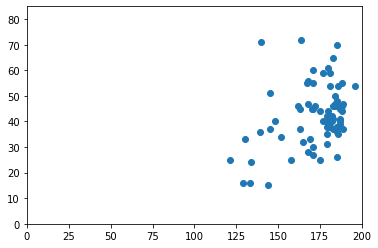

In [9]:
x = goals_df_clean['X Coordinate']
y = goals_df_clean['Y Coordinate']

plt.scatter(x, y)
plt.xlim(0, 200)
plt.ylim(0, 85)

plt.show()

In [10]:
import seaborn as sns

c:\Users\lokalv1\Anaconda3\envs\python_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


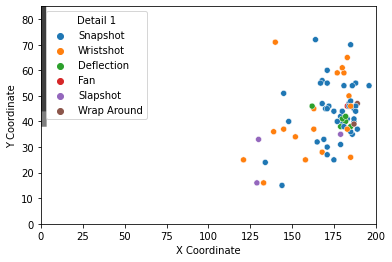

In [27]:
fig, ax = plt.subplots()
goal_plot = sns.scatterplot('X Coordinate', 'Y Coordinate', data=goals_df_clean, hue='Detail 1')

ax.set_xlim(0, 200)
ax.set_ylim(0, 85)

# plt.scatter(189, 42.5, marker='s', s=100)
goal_location = [189,189], [39.5, 45.5]

plt.plot(goal_location, linewidth=8, alpha = 0.5, color='k')

# plt.scatter(11, 42.5, marker='s', s=100)
plt.show()

In [12]:
# corr = goals_df.corr()

# fig, ax = plt.subplots()
# sns.heatmap(corr)

In [13]:
# sns.pairplot(goals_df)

In [14]:
goals_df_clean.to_csv('goals_df_clean.csv', index=True)

In [15]:
games_df = df.groupby(['game_date', 'Home Team', 'Away Team']).size().copy()
print(games_df)
print('number of games: ' + str(len(games_df.index)))
# games_df.to_csv('TEST games_df.csv', index=False)




game_date   Home Team              Away Team            
2021-01-23  Buffalo Beauts         Connecticut Whale        1997
            Metropolitan Riveters  Toronto Six              1719
            Minnesota Whitecaps    Boston Pride             1649
2021-01-24  Boston Pride           Buffalo Beauts           1798
            Connecticut Whale      Metropolitan Riveters    1870
            Toronto Six            Minnesota Whitecaps      1881
2021-01-26  Metropolitan Riveters  Minnesota Whitecaps      1817
            Toronto Six            Boston Pride             1730
2021-01-27  Buffalo Beauts         Toronto Six              1771
            Connecticut Whale      Boston Pride             1827
2021-01-30  Buffalo Beauts         Boston Pride             1793
            Toronto Six            Minnesota Whitecaps      1747
2021-01-31  Boston Pride           Buffalo Beauts           1766
            Toronto Six            Connecticut Whale        1772
2021-02-01  Buffalo Beauts       

In [16]:
# df['game_desc'] = df['Home Team'] + " vs " + df['Away Team']
# df.drop('game_desc', 1)
# df.head()

In [17]:
new_df = df.copy()

new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = new_df.pop('game_id')
new_df.insert(0, 'game_id', first_column)

# df.to_csv('TEST game id.csv', index=False)

In [18]:
columns = list(new_df.columns.values)
event_before_goal_df = pd.DataFrame(columns=columns)

# entry = pd.DataFrame()

entry = new_df.loc[7]
event_before_goal_df.loc[len(event_before_goal_df)] = entry
print(event_before_goal_df)

  game_id   game_date            Home Team     Away Team Period  Clock  \
0       1  2021-01-23  Minnesota Whitecaps  Boston Pride      1  19:48   

  Home Team Skaters Away Team Skaters Home Team Goals Away Team Goals  ...  \
0                 5                 5               0               0  ...   

        Event X Coordinate Y Coordinate Detail 1 Detail 2 Detail 3 Detail 4  \
0  Zone Entry          125            6  Carried      NaN      NaN      NaN   

          Player 2 X Coordinate 2 Y Coordinate 2  
0  Kaleigh Fratkin            NaN            NaN  

[1 rows x 22 columns]


In [19]:
x = 0
i = 1
columns = list(new_df.columns.values)
event_before_goal_df = pd.DataFrame(columns=columns)





while i < len(new_df):
    if (new_df['Event'][i] == 'Goal'):
        entry = new_df.loc[i-1]
        event_before_goal_df.loc[len(event_before_goal_df)] = entry
        
    i += 1

        
# print(event_before_goal_df)        


In [20]:
# event_before_goal_df.to_csv('event_before_goal_df.csv', index=False)

In [21]:
# event_before_goal_df['Detail Summary'] = event_before_goal_df['Event'] + ' ' + event_before_goal_df['Detail 1']
# event_before_goal_df.head()

event_before_goal_df['Detail Summary'] = np.where(event_before_goal_df['Detail 1'].notnull(), event_before_goal_df['Event'] + ' ' + event_before_goal_df['Detail 1'], event_before_goal_df['Event'])
event_before_goal_df.head()


,game_id,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,...,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,Detail Summary
0,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,6:42,5,5,0,0,...,175,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puck Recovery
1,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:40,5,5,0,1,...,180,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puck Recovery
2,1,2021-01-23,Minnesota Whitecaps,Boston Pride,2,8:02,5,5,1,1,...,188,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puck Recovery
3,2,2021-01-23,Buffalo Beauts,Connecticut Whale,2,15:55,5,5,0,0,...,124,15,Carried,NaN,NaN,NaN,Alyson Matteau,NaN,NaN,Zone Entry Carried
4,2,2021-01-23,Buffalo Beauts,Connecticut Whale,3,14:33,5,4,0,1,...,148,65,Direct,NaN,NaN,NaN,Kristin Lewicki,165.0,20.0,Play Direct


In [22]:
x = event_before_goal_df['Detail Summary']
# y = LabelBinarizer().fit_transform(x)
LB = LabelBinarizer()

y = pd.DataFrame(LB.fit_transform(event_before_goal_df['Detail Summary']), columns=LB.classes_)

event_before_goal_df = pd.concat([event_before_goal_df, y], axis=1)
event_before_goal_df['Goal Event'] = 1
event_before_goal_df.info()
# event_before_goal_df.to_csv('event_before_goal_df.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   game_id             76 non-null     object
 1   game_date           76 non-null     object
 2   Home Team           76 non-null     object
 3   Away Team           76 non-null     object
 4   Period              76 non-null     object
 5   Clock               76 non-null     object
 6   Home Team Skaters   76 non-null     object
 7   Away Team Skaters   76 non-null     object
 8   Home Team Goals     76 non-null     object
 9   Away Team Goals     76 non-null     object
 10  Team                76 non-null     object
 11  Player              76 non-null     object
 12  Event               76 non-null     object
 13  X Coordinate        76 non-null     object
 14  Y Coordinate        76 non-null     object
 15  Detail 1            47 non-null     object
 16  Detail 2            4 non-nu

In [23]:
x = event_before_goal_df.iloc[:, 23:78]
goals = [1]*76
y = pd.DataFrame({'Goals':goals})
print(x)

    Play Direct  Play Indirect  Puck Recovery  Shot Deflection  Shot Slapshot  \
0             0              0              1                0              0   
1             0              0              1                0              0   
2             0              0              1                0              0   
3             0              0              0                0              0   
4             1              0              0                0              0   
..          ...            ...            ...              ...            ...   
71            0              0              0                0              0   
72            0              0              0                0              0   
73            0              0              0                0              0   
74            1              0              0                0              0   
75            0              0              1                0              0   

    Shot Snapshot  Takeaway

In [24]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [25]:
# LR = LogisticRegression()
# LR.fit(x_train, y_train)

# y_prediction = LR.predict(x_test)
# y_prediction

In [26]:
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

NameError: name 'y_test' is not defined

### Try Logistic Regression Again with full dataset

In [ ]:
new_df['Goal Target'] = 0

i=0

while i < len(new_df):
    if (new_df['Event'][i] == 'Goal'):

        new_df.at[i-1, 'Goal Target'] = 1


    i += 1

new_df['Goal Target'].sum()


76

In [ ]:
new_df = df.copy()

new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = new_df.pop('game_id')
new_df.insert(0, 'game_id', first_column)

new_df['Detail Summary'] = np.where(new_df['Detail 1'].notnull(), new_df['Event'] + ' ' + new_df['Detail 1'], new_df['Event'])

new_df['Goal Target'] = 0

i=0

while i < len(new_df):
    if (new_df['Event'][i] == 'Goal'):

        new_df.at[i-1, 'Goal Target'] = 1


    i += 1

new_df['Goal Target'].sum()

LB = LabelBinarizer()

labels = pd.DataFrame(LB.fit_transform(new_df['Detail Summary']), columns=LB.classes_)
new_df = pd.concat([new_df, labels], axis=1)

new_df.to_csv('new_df.csv', index=False)
print(new_df)

       game_id   game_date            Home Team     Away Team  Period  Clock  \
0            1  2021-01-23  Minnesota Whitecaps  Boston Pride       1  20:00   
1            1  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:58   
2            1  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:57   
3            1  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:55   
4            1  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:53   
...        ...         ...                  ...           ...     ...    ...   
26877       15  2021-02-01       Buffalo Beauts  Boston Pride       3   0:06   
26878       15  2021-02-01       Buffalo Beauts  Boston Pride       3   0:06   
26879       15  2021-02-01       Buffalo Beauts  Boston Pride       3   0:05   
26880       15  2021-02-01       Buffalo Beauts  Boston Pride       3   0:03   
26881       15  2021-02-01       Buffalo Beauts  Boston Pride       3   0:03   

       Home Team Skaters  Away Team Ska

In [ ]:
y = new_df.iloc[:, 23]
x = new_df.iloc[:, 23:67]
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
26877    0
26878    0
26879    0
26880    0
26881    0
Name: Goal Target, Length: 26882, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
LR = LogisticRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(str(y_prediction))
y_prediction_df = pd.DataFrame(y_prediction)
# y_prediction_df.to_csv('y_prediction_df.csv')

confusion_matrix = confusion_matrix(y_test, y_prediction)
print(confusion_matrix)

[0 0 0 ... 0 0 0]
[[5366    0]
 [   0   11]]


In [ ]:
print(LR.coef_)

[[ 9.29653444e+00 -3.31524637e-01 -5.88118982e-02 -1.48884485e-01
  -3.53057534e-04 -6.10005474e-02 -2.11443123e-03 -3.53057534e-04
  -1.05838832e-03 -1.22045407e-02 -7.05853473e-04 -5.96673617e-03
  -3.82413378e-01 -2.90161108e-01 -3.53057534e-04 -2.46592664e-03
  -3.53057534e-04 -3.53057534e-04 -7.05853473e-04 -3.53057534e-04
  -3.53057534e-04 -3.51886305e-03  0.00000000e+00 -6.31541325e-03
  -7.05853473e-04 -8.74908530e-03 -5.26862008e-03 -1.41066256e-03
  -1.05838832e-03 -9.78832704e-03  0.00000000e+00  6.92836738e-01
  -2.81276740e-01  3.38116790e-01  1.65692770e-01 -1.90422197e-02
   1.21754288e-01  1.16112650e-01 -7.01200783e-03 -1.61911433e-01
  -8.54106003e-02  3.12522851e-01 -1.43584072e-01  2.88268544e-01]]


c:\Users\lokalv1\Anaconda3\envs\python_env\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\lokalv1\Anaconda3\envs\python_env\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  1.0
mean_sqrd_error is== 0.0
root_mean_squared error of is== 0.0


In [ ]:
TEST_new_df = df.copy()

TEST_new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = TEST_new_df.pop('game_id')
TEST_new_df.insert(0, 'game_id', first_column)

TEST_new_df['Goal Target'] = 0

i=0

while i < len(TEST_new_df):
    if (TEST_new_df['Event'][i] == 'Goal'):

        TEST_new_df.at[i-1, 'Goal Target'] = 1


    i += 1

TEST_new_df['Goal Target'].sum()

LB = LabelBinarizer()

labels = pd.DataFrame(LB.fit_transform(TEST_new_df['Event']), columns=LB.classes_)
TEST_new_df = pd.concat([TEST_new_df, labels], axis=1)

TEST_new_df

,game_id,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,...,Dump In/Out,Faceoff Win,Goal,Incomplete Play,Penalty Taken,Play,Puck Recovery,Shot,Takeaway,Zone Entry
0,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26877,15,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,...,0,0,0,0,0,0,1,0,0,0
26878,15,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,...,0,0,0,0,0,1,0,0,0,0
26879,15,2021-02-01,Buffalo Beauts,Boston Pride,3,0:05,4,5,1,7,...,1,0,0,0,0,0,0,0,0,0
26880,15,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
TEST_new_df.to_csv('TEST_new_df.csv', index=False)

In [ ]:
y2 = TEST_new_df.iloc[:, 22]
x2 = TEST_new_df.iloc[:, 23:34]
# x2 = x2.drop('Goal', 1)

print(x2)

       Dump In/Out  Faceoff Win  Incomplete Play  Penalty Taken  Play  \
0                0            1                0              0     0   
1                0            0                0              0     0   
2                0            0                0              0     0   
3                0            0                0              0     0   
4                0            1                0              0     0   
...            ...          ...              ...            ...   ...   
26877            0            0                0              0     0   
26878            0            0                0              0     1   
26879            1            0                0              0     0   
26880            0            0                0              0     0   
26881            0            0                0              0     1   

       Puck Recovery  Shot  Takeaway  Zone Entry  
0                  0     0         0           0  
1                  1 

C:\Users\lokalv1\AppData\Local\Temp\ipykernel_21312\3273106891.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x2 = x2.drop('Goal', 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)
LR = LogisticRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(str(y_prediction))
y_prediction_df = pd.DataFrame(y_prediction)

[0 0 0 ... 0 0 0]


In [ ]:
print(LR.coef_)

[[-0.92916238 -0.59072111 -1.23627507 -0.16041573  1.14771353  0.75458152
   0.42603038 -0.21188163  0.9005065 ]]


In [ ]:

confusion_matrix = confusion_matrix(y_test, y_prediction)
print(confusion_matrix)

[[5366    0]
 [  11    0]]


In [ ]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y_train,x_train)
# result=logit_model.fit()
# print(result.summary())

In [ ]:
expected_goals_df = pd.read_csv('./Expected_Goal_Percentage.csv')
expected_goals_df = expected_goals_df.drop(expected_goals_df.columns[0], axis=1)

In [ ]:
expected_goals_df

,Player,Event,X,Y,Distance,Slope,Type,Detail,Period,Home Team Skaters,Away Team Skaters,Result,Predicted Result,xG%
0,McKenna Brand,Shot,131,28,70.507092,0.213294,Snapshot,On Net,1,5,5,0,0,0.180660
1,Allie Thunstrom,Shot,162,2,55.536024,1.808902,Snapshot,On Net,1,5,5,0,0,0.006062
2,Nina Rodgers,Shot,167,18,41.100487,0.917545,Snapshot,Missed,1,5,5,0,0,0.000863
3,McKenna Brand,Shot,175,68,35.710643,-1.628130,Snapshot,On Net,1,5,5,0,0,0.064964
4,Lauren Kelly,Shot,196,20,22.852790,-0.773201,Snapshot,On Net,1,5,5,0,0,0.394736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Taylor Wenczkowski,Shot,180,40,20.155644,0.125655,Snapshot,On Net,3,5,5,0,1,0.607468
1416,Marie-Jo Pelletier,Shot,155,36,45.467021,0.145457,Slapshot,Missed,3,5,5,0,0,0.002236
1417,Autumn MacDougall,Shot,153,39,47.130139,0.074606,Snapshot,On Net,3,5,5,0,0,0.375723
1418,Samantha Davis,Shot,162,62,42.711240,-0.563512,Slapshot,On Net,3,4,5,0,0,0.013410


Dump in and out not as good as previously thought
ZOne entry really important and so is defending opposing zone entry
Need to measure player performance, but the other team might be bad, so create metric to compare opposing team
    1st line plays the most minutes, then 2nd then 3rd. 3rd line might be really good on paper, but only play against other bad 3rd line players
Center needs to be all rounder
Faceoffs not good correlation
10% is typical shooting %
goals per minute on ice is MOST important
measure goals against a team while on ice to measure if a player is a good scorer, but bad defender
Weight goals based on where they they were taken on the ice
    easier to score closer to net, longer range goals are random, but right in the middle requires the most skill
normal shots are better (less random) than deflections
Austin matthews: higher shooting %, but can be attributed to luck -> try and find players with high on ice time